In [ ]:
# Numpy

import numpy as np

# Para dataframes
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt1
import matplotlib as mpl
%matplotlib inline

import matplotlib.pylab as plt # Para gráficos

import seaborn as sns

In [ ]:
!pip install neurolib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.0/315.0 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=9ee26ffe55c9b73b6cb1e01fa21b2327d9f617207a1e4ea90f9dfa8e325d6ae1
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for pypet: filename=pypet-0.6.1-py3-none-any.whl size=345818 sha256=237

In [ ]:
import neurolib

In [ ]:
from functools import partial
from neurolib.models.aln import ALNModel
from neurolib.utils.loadData import Dataset
from neurolib.utils.signal import RatesSignal, BOLDSignal

import scipy

# Importamos el modelo ALN
from neurolib.models.aln import ALNModel

# Importar funciones de la libreria
import neurolib.utils.functions as func

# Colormap
plt.rcParams['image.cmap'] = 'viridis'

In [ ]:
ds = Dataset("hcp")


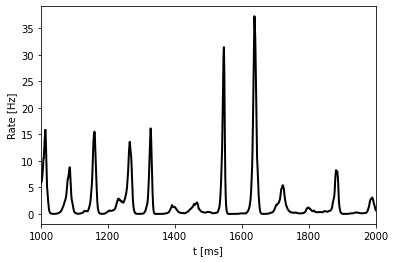

In [ ]:
#Como se ve el modelo ALN
model = ALNModel()
model.params['sigma_ou'] = 0.1 # add some noise

model.run()
plt.plot(model['t'], model['rates_exc'].T, lw=2, c='k')
plt.xlabel("t [ms]")
plt.ylabel("Rate [Hz]")
plt.xlim(1000, 2000);

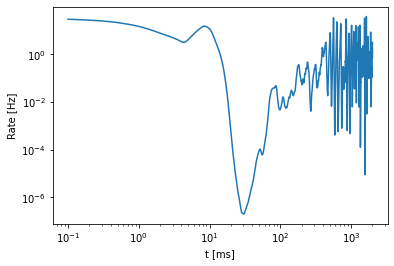

In [ ]:
plt.plot(model['t'], model['rates_exc'].T)
plt.xscale("log")

plt.yscale("log")

plt.xlabel("t [ms]")
plt.ylabel("Rate [Hz]")


plt.show()

In [ ]:
#nuevos parametros para el modelo
model = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

model2 = ALNModel()
model.params['duration'] = 3*60*1000
# Info: value 0.2*60*1000 is low for testing
# use 5*60*1000 for real simulation
model.params['mue_ext_mean'] = 1.57
model.params['mui_ext_mean'] = 1.6
# We set an appropriate level of noise
model.params['sigma_ou'] = 0.09
# And turn on adaptation with a low value of spike-triggered adaptation currents.
model.params['b'] = 5.0

Let's have a look what the data looks like. We can access the data of each model by calling its internal attrivbutes. Here, we plot the structural connectivity matrix by calling model.params['Cmat'] and fiber length matrix by calling model.params['lengthMat']. *

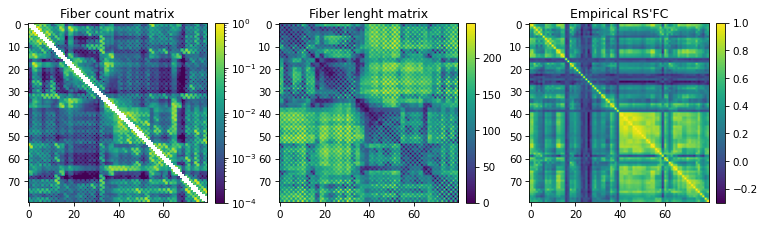

In [ ]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 3, figsize=(12,8), dpi=75)
fig.subplots_adjust(wspace=0.28)

im = axs[0].imshow(model.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(model.params['Cmat'])))
axs[0].set_title("Fiber count matrix")
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
im = axs[1].imshow(model.params['lengthMat'], cmap='viridis')
axs[1].set_title("Fiber lenght matrix")
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)
im = axs[2].imshow(ds.FCs[0], cmap='viridis')
axs[2].set_title("Empirical RS'FC")
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04)

#Cmat fiber count matrix
#Dmat fiber lenght matrix
#Empirical FC / empirical RS-fc

#Analysis of spontaneously correlated low-frequency activity fluctuations across
#the brain using functional magnetic resonance imaging (MRI)-commonly referred to as resting-state functional connectivity (RSFC)
#ref  https://pubmed.ncbi.nlm.nih.gov/26304310/

In [ ]:
model.run(chunkwise=True, chunksize = 100000, bold=True)

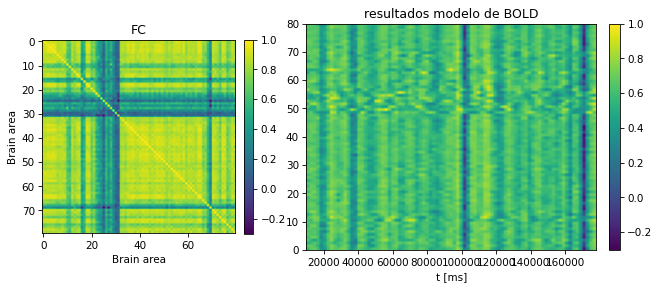

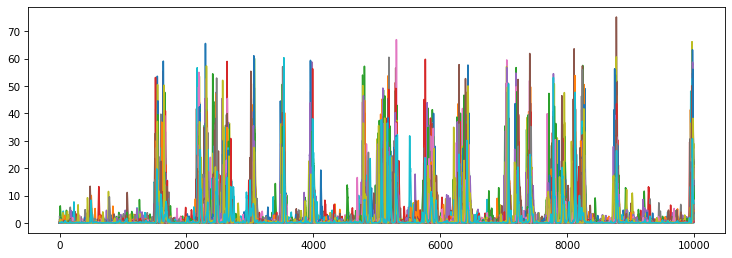

In [ ]:

# Plot functional connectivity and BOLD timeseries (z-scored)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=75, gridspec_kw={'width_ratios' : [1, 1.5]})
axs[0].imshow(func.fc(model.BOLD.BOLD[:, 5:]))
axs[1].imshow(scipy.stats.mstats.zscore(model.BOLD.BOLD[:, model.BOLD.t_BOLD>10000], axis=1), aspect='auto', extent=[model.BOLD.t_BOLD[model.BOLD.t_BOLD>10000][0], model.BOLD.t_BOLD[-1], 0, model.params['N']]);

axs[0].set_title("FC")
axs[0].set_xlabel("Brain area")
axs[0].set_ylabel("Brain area")
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
axs[1].set_title("resultados modelo de BOLD")
axs[1].set_xlabel("t [ms]")
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)

# the results of the model are also accesible through an xarray DataArray
fig, axs = plt.subplots(1, 1, figsize=(12, 4), dpi=75)

plt.plot(model.xr().time, model.xr().loc['rates_exc'].T);

Text(0.5, 1.0, 'Neural activity')

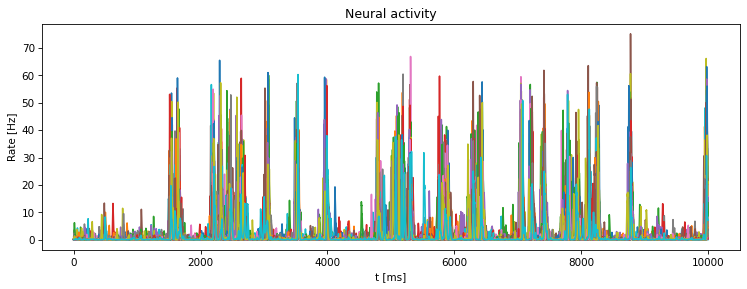

In [ ]:

fig, axs = plt.subplots(1, 1, figsize=(12, 4), dpi=75)


plt.plot(model.xr().time, model.xr().loc['rates_exc'].T);
plt.xlabel('t [ms]')
plt.ylabel('Rate [Hz]')

# displaying the title
plt.title("Neural activity")

In [ ]:
# correlacion entre datos empiricos FC vs modelo
scores = [func.matrix_correlation(func.fc(model.BOLD.BOLD[:, 5:]), fcemp) for fcemp in ds.FCs]

print("Correlation per subject:", [f"{s:.2}" for s in scores])
print(f"Mean FC/FC correlation: {np.mean(scores):.2}")

Correlation per subject: ['0.52', '0.65', '0.46', '0.64', '0.48', '0.61', '0.49']
Mean FC/FC correlation: 0.55


In [ ]:
def plot_output_and_spectrum(model, individual=False, vertical_mark=None):
    """A simple plotting function for the timeseries
    and the power spectrum of the activity.
    """
    fig, axs = plt.subplots(
        1, 2, figsize=(8, 2), dpi=150, gridspec_kw={"width_ratios": [2, 1]}
    )
    axs[0].plot(model.t, model.output.T, lw=1)
    axs[0].set_xlabel("Time [ms]")
    axs[0].set_ylabel("Activity [Hz]")

    frs, powers = func.getMeanPowerSpectrum(model.output, dt=model.params.dt)
    axs[1].plot(frs, powers, c="k")

    if individual:
        for o in model.output:
            frs, powers = func.getPowerSpectrum(o, dt=model.params.dt)
            axs[1].plot(frs, powers)

    axs[1].set_xlabel("Frequency [Hz]")
    axs[1].set_ylabel("Power")

    plt.show()

    plot_output_and_spectrum(model)

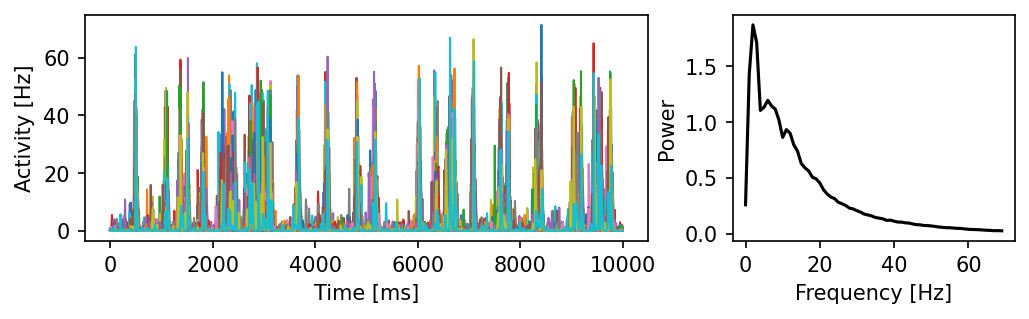

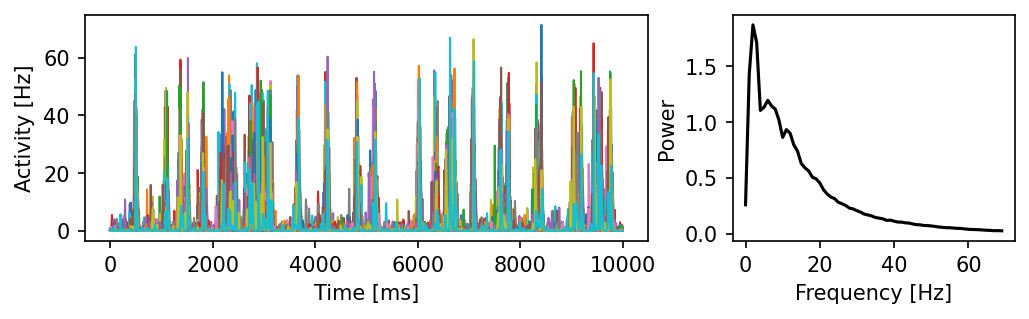

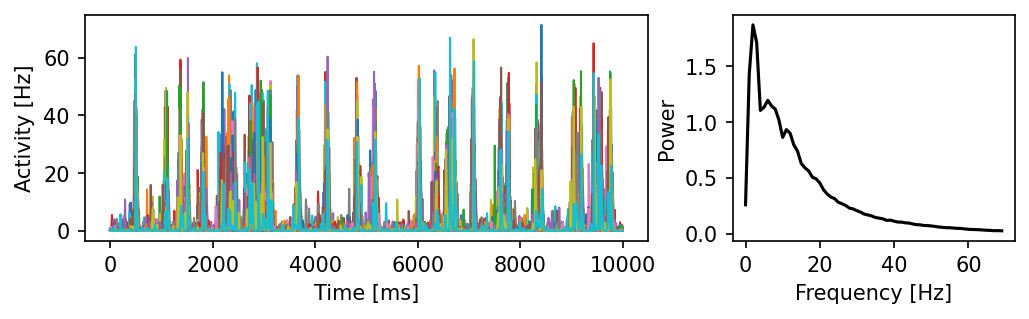

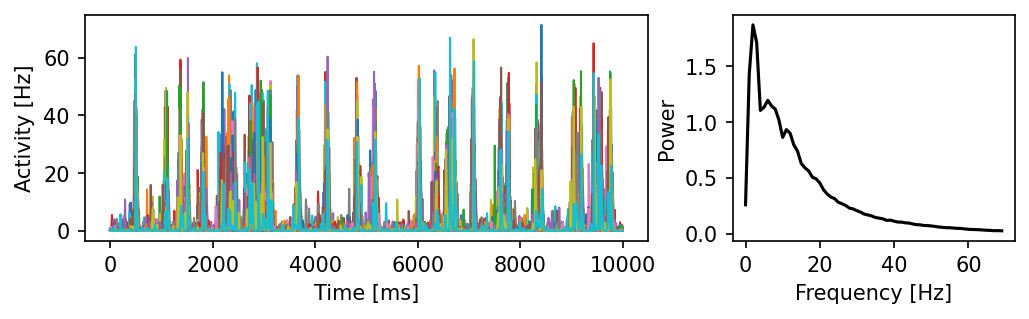

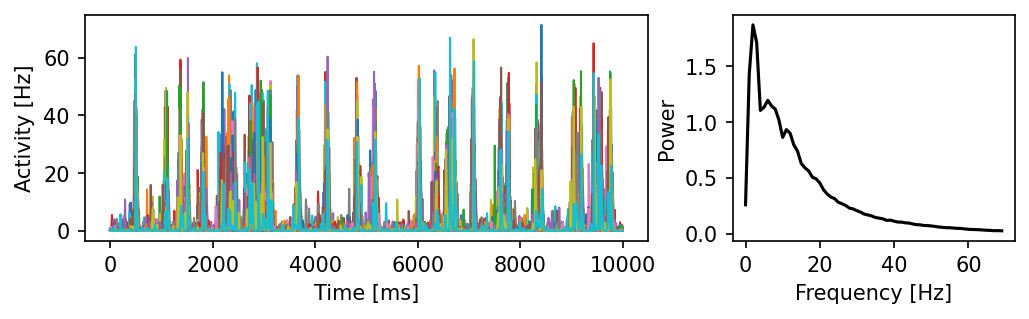

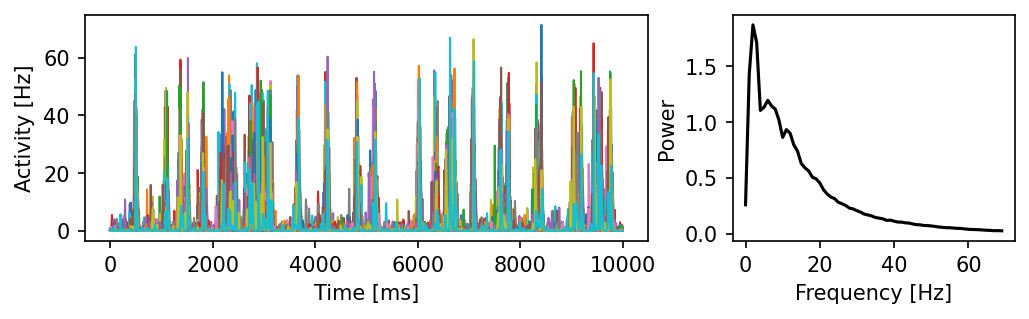

In [ ]:
#esta explota
plot_output_and_spectrum(model)

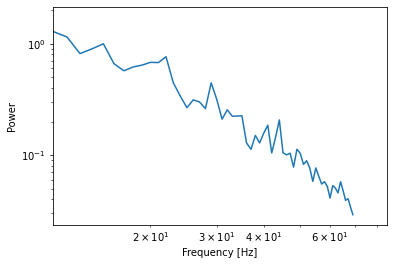

In [ ]:
#este es el gráfico a fitear con lineal
# el x e y son los graficados en el espectro de potencia arriba:
#x=frs
#y = powers

for o in model.output:
            frs, powers = func.getPowerSpectrum(o, dt=model.params.dt)

def power_law(x, a, b):
    return a * np.power(x, -b)



plt.plot(frs, powers)

plt.xscale("log")

plt.xlim(10^1, )

plt.yscale("log")


plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")




plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


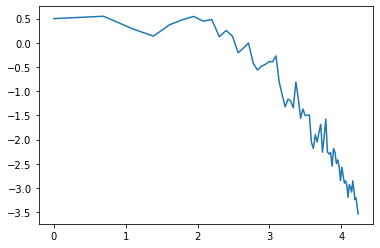

In [ ]:
a = np.log(frs)
b = np.log(powers)


plt.plot(a, b)

plt.show()

In [ ]:
type (frs)


numpy.ndarray

In [ ]:
frs.shape

(70,)

In [ ]:
frs2 = np.log(frs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [ ]:
powers2 = np.log(powers)

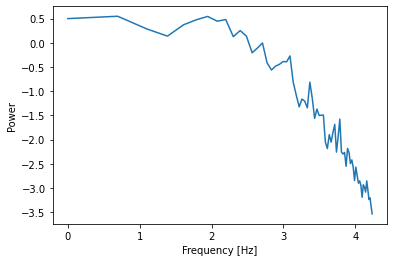

In [ ]:
for o in model.output:
            frs, powers = func.getPowerSpectrum(o, dt=model.params.dt)

def power_law(x, a, b):
    return a * np.power(x, -b)



plt.plot(frs2, powers2)




plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")




plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


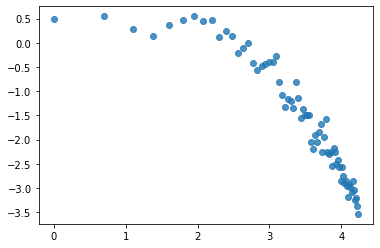

In [ ]:
splot = sns.regplot(frs2, powers2)

In [ ]:


def power_law(x, a, b):
    return a * np.power(x, -b)
from scipy.optimize import curve_fit




popt, pcov = curve_fit(power_law, frs, powers, p0=[1, 1], bounds=[[1e-3, 1e-3], [1e20, 50]])

plt.plot(power_law(frs, *popt), label='power law')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


ValueError: ignored